In [1]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Cargar desde un archivo .csv
data = pd.read_excel('Detalle precios y productos fabricados 2022.xlsx')

In [3]:
#Limpiamos el DataFrame, eliminar valores nulos

#Se crea una copia del archivo 
data1 = data.copy()

In [4]:
#Identificar valores nulos
valores_nulos = data1.isnull().sum()
valores_nulos

CVE_DOC                      0
FECHA_DOC                    0
NOMBRE_VENDEDOR              2
NOMBRE_CLIENTE               0
CANT                         0
CVE_ART                      0
DESCR                        0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
MARGEN_TOTAL_CALCULADO       0
dtype: int64

In [5]:
#Eliminar los valores nulos de la variable "nombre_vendedor"
data1["NOMBRE_VENDEDOR"] = data1["NOMBRE_VENDEDOR"].fillna("Sin nombre")

In [6]:
#Verificamos información del DataFrame
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CVE_DOC                    1426 non-null   object        
 1   FECHA_DOC                  1426 non-null   datetime64[ns]
 2   NOMBRE_VENDEDOR            1426 non-null   object        
 3   NOMBRE_CLIENTE             1426 non-null   object        
 4   CANT                       1426 non-null   int64         
 5   CVE_ART                    1426 non-null   object        
 6   DESCR                      1426 non-null   object        
 7   PRECIO_UNITARIO            1426 non-null   float64       
 8   COSTO_UNITARIO             1426 non-null   float64       
 9   COSTO_UNITARIO_CALCULADO   1426 non-null   float64       
 10  SUBTOTAL_PARTIDA           1426 non-null   float64       
 11  COSTO_TOTAL_CALCULADO      1426 non-null   float64       
 12  MARGEN

In [7]:
#Creamos 2 DataFrame para poder procesar los Outliers
cuantitativas = data1.iloc[ : , [4, 7, 8, 9, 10, 11, 12, 13]]  #Consideramos los valores int y float
cualitativas = data1.iloc[ : , [0, 1, 2, 3, 5, 6]]             #Consideramos los valores object y datetime

Usaremos el método de "Desviación Estándar" para eliminar los Outliers en el DataFrame

In [8]:
#Método aplicando desviación estándar, encontrar los valores externos 

y = cuantitativas
Limite_superior = y.mean() + 3*y.std()
Limite_inferior = y.mean() - 3*y.std()

print("Limite superior permitido ", Limite_superior)
print("Limite inferior permitido ", Limite_inferior)

Limite superior permitido  CANT                            22.531793
PRECIO_UNITARIO               9533.970813
COSTO_UNITARIO                3313.473534
COSTO_UNITARIO_CALCULADO     16686.790475
SUBTOTAL_PARTIDA             31402.663810
COSTO_TOTAL_CALCULADO        18629.377526
MARGEN_UNITARIO_CALCULADO    16001.398440
MARGEN_TOTAL_CALCULADO       28691.369713
dtype: float64
Limite inferior permitido  CANT                           -14.324219
PRECIO_UNITARIO              -6499.204684
COSTO_UNITARIO               -2821.614250
COSTO_UNITARIO_CALCULADO    -15603.765678
SUBTOTAL_PARTIDA            -21404.897036
COSTO_TOTAL_CALCULADO       -15803.336348
MARGEN_UNITARIO_CALCULADO   -14049.656995
MARGEN_TOTAL_CALCULADO      -21519.643893
dtype: float64


In [9]:
#Obtenemos los datos y los Outliers se convierten en nulos en el DataFrame 
data2 = cuantitativas[(y <= Limite_superior) & (y >= Limite_inferior)]
data2

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...
1421,6.0,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,6.0,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,1.0,5909.84,1884.35,1884.35,5909.84,1884.35,4025.49,4025.49


In [10]:
#Corroboramos valores nulos del DataFrame
valores_nulos = data2.isnull().sum()
valores_nulos

CANT                         28
PRECIO_UNITARIO              29
COSTO_UNITARIO               10
COSTO_UNITARIO_CALCULADO      2
SUBTOTAL_PARTIDA             36
COSTO_TOTAL_CALCULADO         5
MARGEN_UNITARIO_CALCULADO    13
MARGEN_TOTAL_CALCULADO       24
dtype: int64

In [11]:
#Reemplazamos valores atípicos (nulos) del DataFrame con "mean"

#Realizamos una copia del DataFrame
data_clean = data2.copy()
data_clean = data_clean.fillna(round(data2.mean(),1))
data_clean

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...
1421,6.0,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,6.0,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,1.0,5909.84,1884.35,1884.35,5909.84,1884.35,4025.49,4025.49


In [12]:
#Corroboramos valores nulos del DataFrame LIMPIO
valores_nulos = data_clean.isnull().sum()
valores_nulos

CANT                         0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
MARGEN_TOTAL_CALCULADO       0
dtype: int64

<Figure size 1500x800 with 0 Axes>

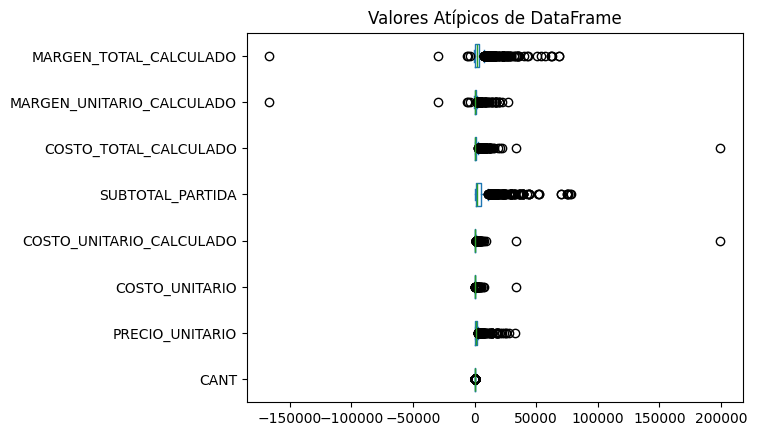

In [13]:
#Realizamos diagrama de caja o bigote de cada columna del DataFrame 
fig = plt.figure(figsize=(15,8))
cuantitativas.plot(kind='box',vert=False)
plt.title("Valores Atípicos de DataFrame")
plt.show()   #Dibujamos el diagrama 

In [15]:
#Convertir DataFrame a .xlsx
data_clean.to_excel("Datos_limpios.xlsx")